<a href="https://colab.research.google.com/github/MTfirst/signate_121_FuelConsumption/blob/master/FuelConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.tsv', delimiter = '\t')

# 車種名からメーカー名をトリミング
train['car name'] = train['car name'].str.split(' ', expand=True)[0]
train['model year'] += 1900
train.horsepower[train.horsepower=='?'] = train[train.horsepower!='?'].horsepower.median()
train_with_nan = train.horsepower[train.horsepower=='?']
train['horsepower'] = train['horsepower'].astype(float).astype(int)
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84,2525.0,16.0,1982,1,dodge
1,3,31.9,4,89.0,71,1925.0,14.0,1979,2,vw
2,9,19.0,6,156.0,108,2930.0,15.5,1976,3,toyota
3,11,28.0,4,90.0,75,2125.0,14.5,1974,1,dodge
4,13,37.7,4,89.0,62,2050.0,17.3,1981,3,toyota


In [0]:
# メーカーのスペルミス等修正

def spell_mod(df, bef, aft):
    for b, a in zip(bef, aft):
        df.replace(b, a, inplace=True)

name_bef = ['chevroelt', 'chevy', 'vw', 'vokswagen', 'toyouta', 'toyota', 'capri', 'datsun', 'mercury', 'plymouth', 'triumpy', 'triumpy']
name_aft = ['chevrolet', 'chevrolet', 'volkswagen', 'volkswagen', 'ford', 'nissan', 'ford', 'fiat', 'bmw', 'international harvester']


# メーカー　-> 国
USA = ['amc', 'buick', 'chevrolet', 'dodge', 'ford', 'international harvester', 'oldsmobile', 'pontiac']
GERMANY = ['audi', 'bmw', 'mercedes-benz', 'opel', 'volkswagen']
ITALY = ['fiat']
JAPAN = ['honda', 'mazda', 'nissan', 'toyota']
FRANCE = ['peugeot', 'renault']
SWEDEN = ['saab', 'volvo']

country_name = ['USA', 'GERMANY', 'ITALY', 'JAPAN', 'FRANCE', 'SWEDEN']
country_variable= [USA, GERMANY, ITALY, JAPAN, FRANCE, SWEDEN]


def create_map(k, v):
    for s in k:
        carmap[s] = v


def brand_to_country(df, m):
    dftmp = df['car name'].copy()
    dftmp = dftmp.map(m)
    df = df.drop('car name', axis=1)
    df = pd.concat([df, dftmp], axis=1)
    df = df.rename(columns={'car name':'country'})
    df = pd.get_dummies(df, columns=['country'])
#     df = pd.get_dummies(df, columns=['origin'])
    return df

In [0]:
carmap = {}
for i in range(len(country_name)):
    create_map(country_variable[i], country_name[i])


spell_mod(train, name_bef, name_aft)
train = brand_to_country(train, carmap)
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_FRANCE,country_GERMANY,country_ITALY,country_JAPAN,country_SWEDEN,country_USA
0,0,29.0,4,135.0,84,2525.0,16.0,1982,1,0,0,0,0,0,1
1,3,31.9,4,89.0,71,1925.0,14.0,1979,2,0,1,0,0,0,0
2,9,19.0,6,156.0,108,2930.0,15.5,1976,3,0,0,0,1,0,0
3,11,28.0,4,90.0,75,2125.0,14.5,1974,1,0,0,0,0,0,1
4,13,37.7,4,89.0,62,2050.0,17.3,1981,3,0,0,0,1,0,0


In [0]:
test = pd.read_csv('test.tsv', delimiter = '\t')
test['car name'] = test['car name'].str.split(' ', expand=True)[0]
test.horsepower[test.horsepower == '?'] = test[test.horsepower != '?'].horsepower.median()
test['horsepower'] = test['horsepower'].astype(float).astype(int)
test['model year'] += 1900

test_temp = pd.get_dummies(test['car name'])
test_origin_brand = test_temp.columns.tolist()

all_brand = USA + GERMANY + ITALY + JAPAN + FRANCE + SWEDEN

for s in test_origin_brand:
    if not s in all_brand:
        print(s)
        

name_bef += ['maxda', 'mercedes']
name_aft += ['mazda', 'mercedes-benz']



cadillac
chevy
chrysler
datsun
maxda
mercedes
mercury
plymouth
subaru
vw


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
spell_mod(test, name_bef, name_aft)
USA += ['cadillac', 'chrysler']

test = brand_to_country(test, carmap)

In [0]:
# train = train.drop('car name', axis=1)
# test = test.drop('car name', axis=1)

In [0]:
col = train.columns.tolist()
col.remove('mpg')
col.append('mpg')
train = train.loc[:, col]
col = train.columns.tolist()
train.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country_FRANCE,country_GERMANY,country_ITALY,country_JAPAN,country_SWEDEN,country_USA,mpg
0,0,4,135.0,84,2525.0,16.0,1982,1,0,0,0,0,0,1,29.0
1,3,4,89.0,71,1925.0,14.0,1979,2,0,1,0,0,0,0,31.9
2,9,6,156.0,108,2930.0,15.5,1976,3,0,0,0,1,0,0,19.0
3,11,4,90.0,75,2125.0,14.5,1974,1,0,0,0,0,0,1,28.0
4,13,4,89.0,62,2050.0,17.3,1981,3,0,0,0,1,0,0,37.7


In [0]:
# train['cylinders_odd'] = int(0)
# train[train['cylinders'] % 2 != 0]['cylinders_odd'] = int(1)
# train

cylinders
origin
country_FRANCE
country_GERMANY
country_ITALY
country_JAPAN
country_SWEDEN
country_USA


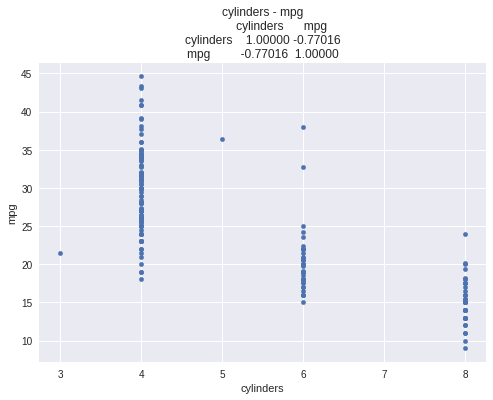

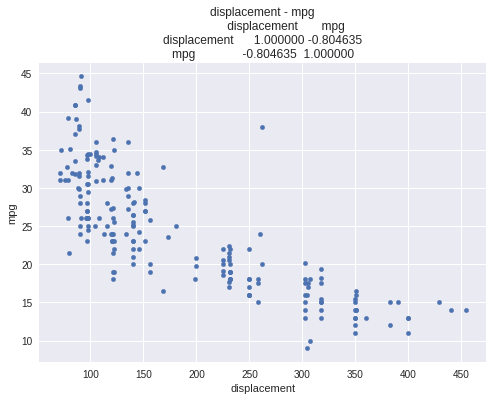

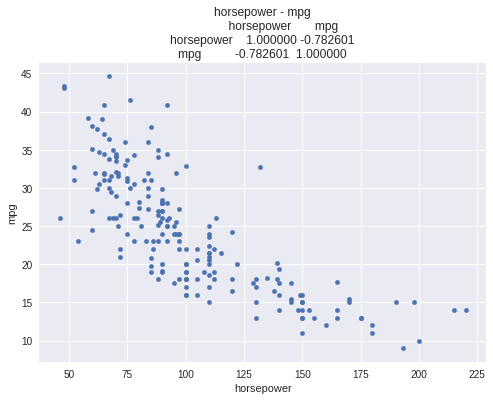

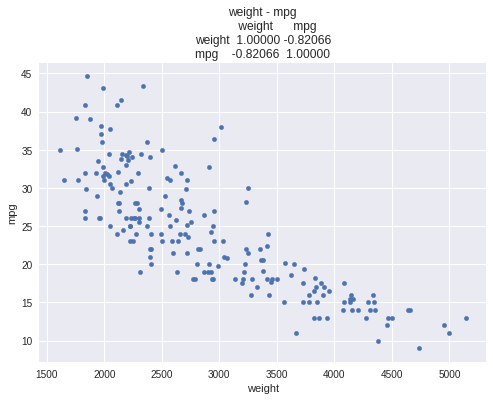

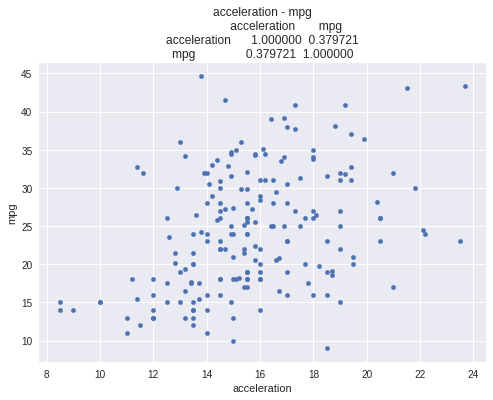

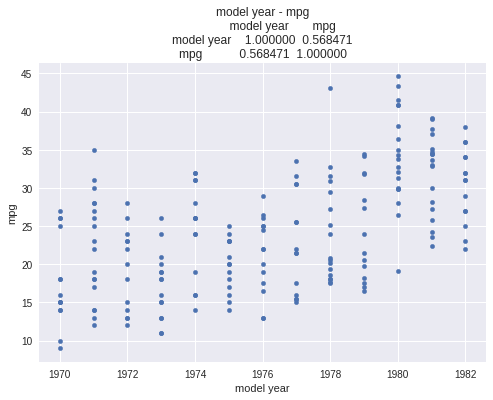

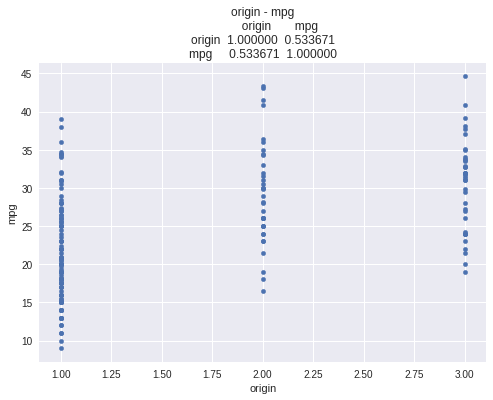

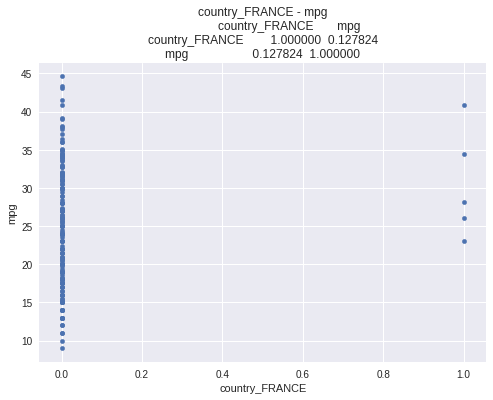

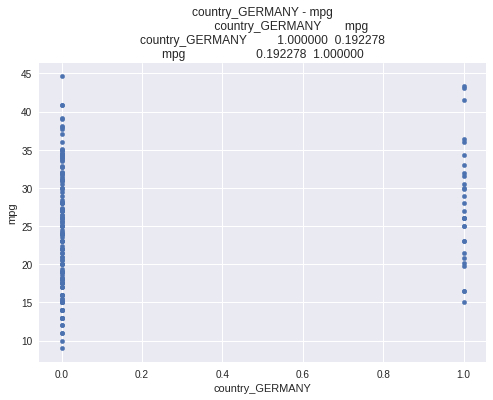

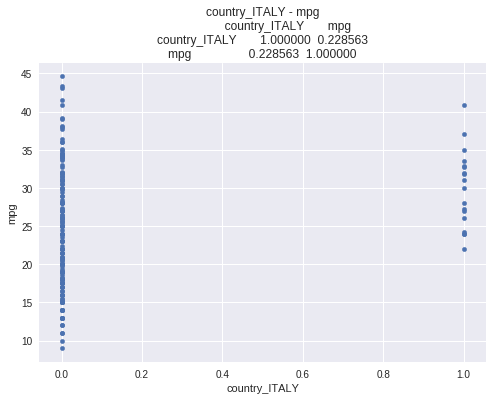

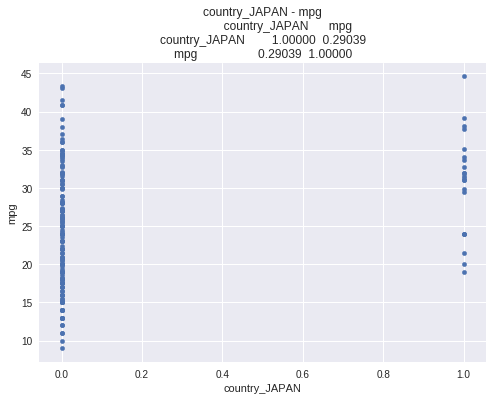

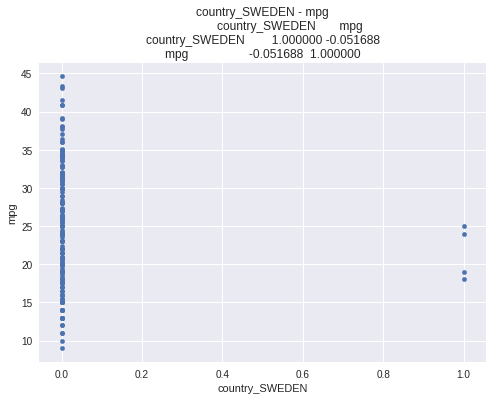

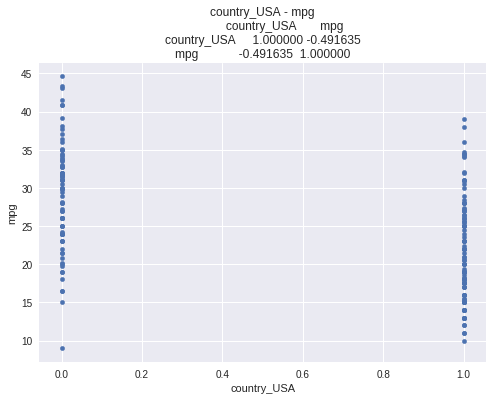

In [0]:
def PLOT(X, Y):
    if X in ['cylinders', 'origin'] or 'country' in X:
        print(X)
    train.plot.scatter(x=X, y=Y, title=X + ' - ' + Y + '\n' + str(train[[X, Y]].corr()))
    
for s in range(1, len(col) - 1):
        PLOT(col[s], 'mpg')

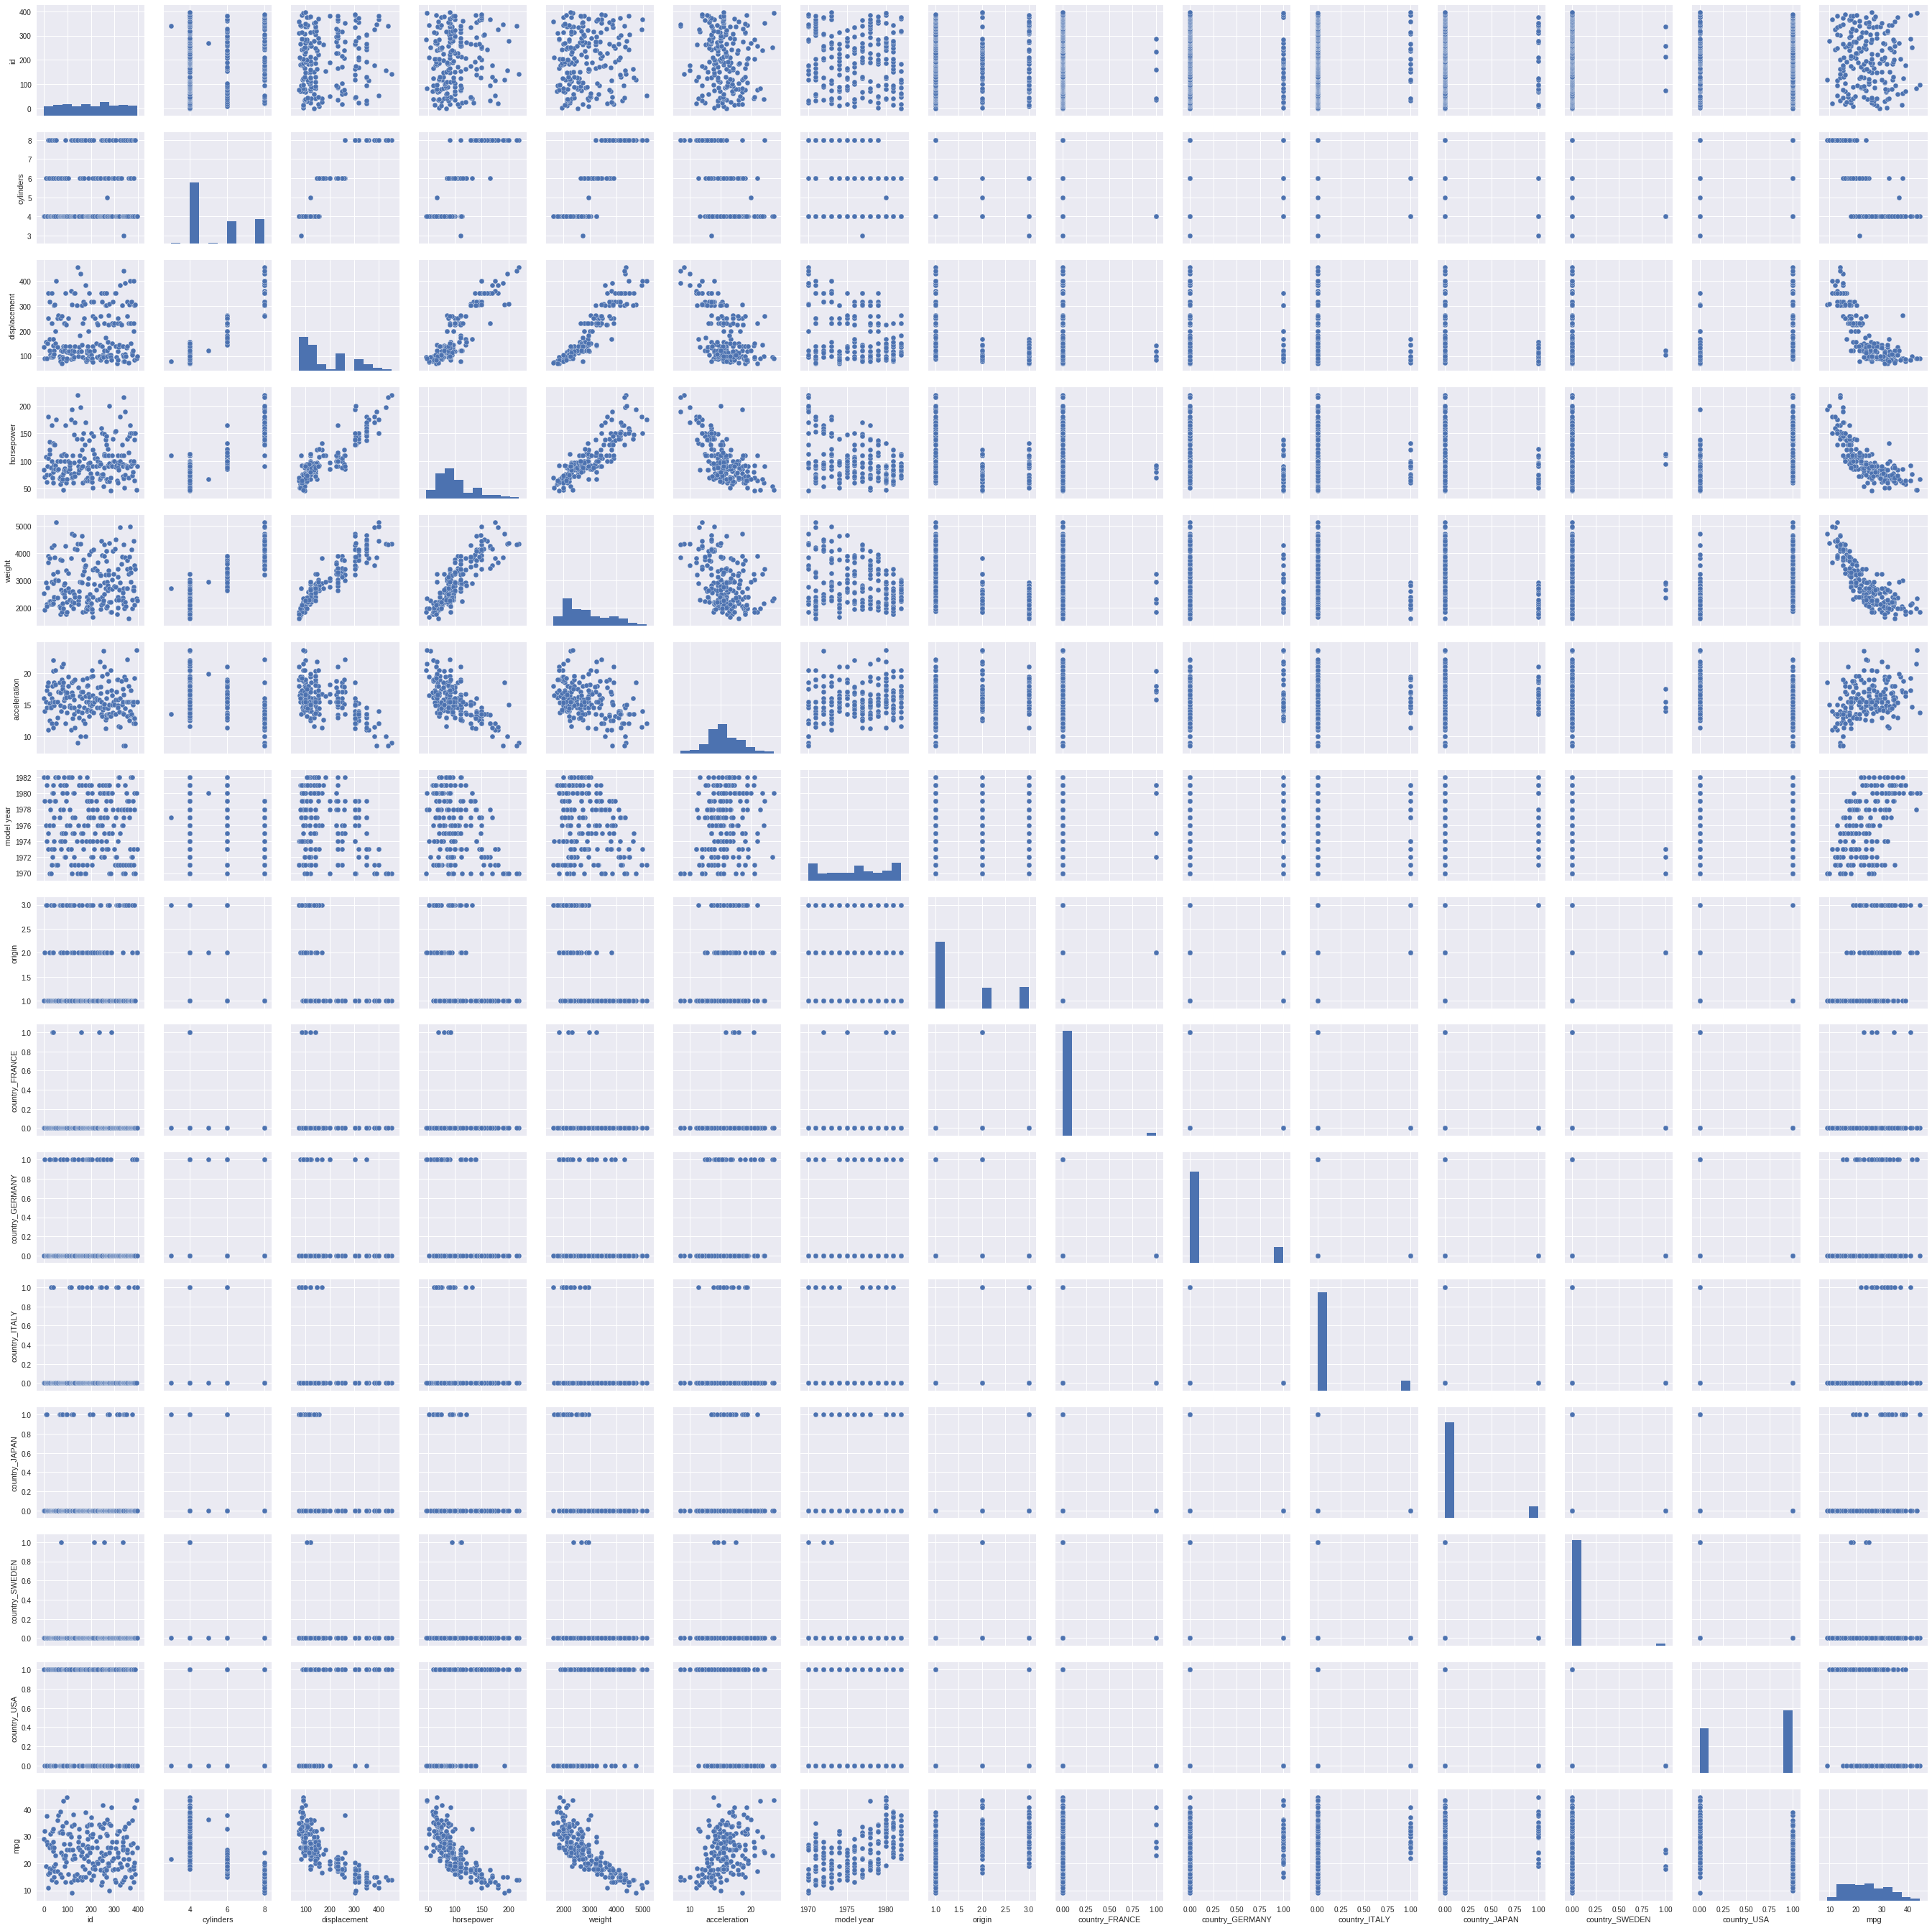

In [0]:
sns.pairplot(train)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.svm import SVC

dropclms = ['id', 'acceleration']
useclms = ['displacement', 'horsepower', 'weight', 'acceleration', 'model year']
# X = train.drop(dropclms + ['mpg'], axis=1).as_matrix()
X = train.loc[:, useclms].as_matrix()
y = train['mpg'].as_matrix()


# 本番モデル作成

In [0]:
clf = RandomForestRegressor(n_estimators=100, random_state=0)

param_grid = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'min_samples_leaf' : [1, 2, 4, 6, 8, 10]
}

In [0]:
import xgboost as xgb
clf = xgb.XGBRegressor()
param_grid = {
    'max_depth': [3, 5, 10], 
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'learning_rate': [0.05, 0.1], 
    'max_depth': [3, 5, 10, 100], 
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.8, 0.85, 0.9, 0.95, 1.0], 
    'colsample_bytree': [0.5, 1.0], 
    'n_estimators': [50,100,200]
}


In [0]:
grid_search = GridSearchCV(clf, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 10, 100], 'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'learning_rate': [0.05, 0.1], 'colsample_bytree': [0.5, 1.0], 'subsample': [0.8, 0.85, 0.9, 0.95, 1.0], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
pred = grid_search.best_estimator_.predict(X)
m = mean_squared_error(y, pred)
print('RMSE : ', np.sqrt(m))

RMSE :  2.0883835159713273


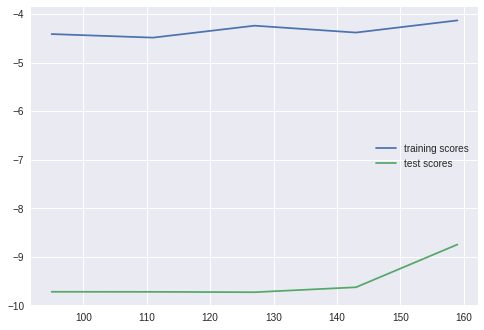

In [0]:
from sklearn.model_selection import learning_curve
training_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X, y, cv=5, scoring="neg_mean_squared_error", train_sizes=[0.6, 0.7, 0.8, 0.9, 1.0])
plt.plot(training_sizes, train_scores.mean(axis=1), label="training scores")
plt.plot(training_sizes, test_scores.mean(axis=1), label="test scores")
plt.legend(loc="best")